# 딥러닝 기초 3강(2018.08.25)
***    

* __강의 목표__: 기계 학습에 대한 기본 용어 학습  

* __이론__: 경사하강법 위주 (Learning problem, computational graph )

* __실습__:  R 기초    



In [1]:
#기본 옵션
options(repr.plot.width=4, repr.plot.height=3)

***

# 0.요약  
1. filter: 결과값을 원하는 방식으로 나타내는 것   

2. 통계 학파: 빈도주의/ 베이즈 주의
http://gentlej90.tistory.com/61

3. 베이즈 정리: 고등학교 때 배운 조건부 서식
4. 베이즈 정리의 의의
> prior(이미 알고 있는 비율)  
  likelihood (사건이 발생할 확률: 가능도)   
  posterior (발생한 결과)  

> posterior: 이미 알고 있는 결과를 의심 -> 새로운 데이터를 찾음  
likelihood: 특정 전제하에서 사건이 발생할 가능성을 고려 -> 새로운 모델 (뉴턴), 딥러닝, model selection  
http://rstudio-pubs-static.s3.amazonaws.com/204928_c2d6c62565b74a4987e935f756badfba.html

5. 확률을 이용해 classification을 푸는 2가지 방법    
> MAP(Maximum A Posterior) : 결과 기준이라 다 더하면 100% (계산 어려움)
  MLE(Maximum Likelihood Estimation) : 더 큰 확률을 선택 (많이 사용)  
    - 장점: posterior보다 계산하기 쉬움
    - 단점: training에는 맞지만, 실제 data와 차이 있을 수 있음(일반화의 오류)
 
6. classification의 loss 
> 각 모델의 loss 값을 곱한다. 

7. 로그 법칙
> 로그 씌우면 지수가 로그 앞으로 가서 계산이 쉬워지고, 보기도 편해진다.

8. one-hot-encoding
> ouput 여러개여도 행열로 표현 가능
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f
 
9. 시그모이드 필터
>범주형 데이터를 0과 1사이의 연속된 숫자로 바꿔주는 함수    
logistic linear model 이라고도 함
10. softmax 함수: 시그모이드 필터와 동일(조건: 양수, 합=1), 비선형은 안됨  

11. MLP(Multilayer Perception)
> 파라미터 갯수 계산하는 법 중요, eg) 신경망


# 시그모이드 필터

In [2]:
# 필터
Sigmoid <- function(x){
  s <- 1 / (1 +exp(-x))
  return(s)
}

Machine_Sigmoid <- function(x, w, b){
  result <- Sigmoid(x*w+b)  # 1차 함수 돌렸을 떄의 값을 리턴해줌
  return(result)
  
}

Cost_Sigmoid <- function(x, w, b, y) {
  y_hat <- Machine_Sigmoid(x,w,b) #예측값
  loss <- -( y * log(y_hat) + (1 - y) * log(1-y_hat) ) 
  cost <- mean(loss) # 제곱한 것의 평균
  return(cost) 
}

Gradient_Sigmoid <- function(x, w, b, y){
  dw <- ( Cost_Sigmoid(x, w + 0.0001, b, y) - Cost_Sigmoid(x, w, b, y) )/0.0001 
  db <- ( Cost_Sigmoid(x, w, b + 0.0001, y) - Cost_Sigmoid(x, w, b, y) )/0.0001
  grad <-list(dw=dw, db=db)
  return(grad)
}

In [3]:
test_df <- read.csv("data3_1.csv", header = TRUE) 
dim(test_df)
summary(test_df)
str(test_df)

[1] 10  2

     money            happiness  
 Min.   :-1.70336   Min.   :0.0  
 1st Qu.:-0.40986   1st Qu.:0.0  
 Median : 0.11657   Median :0.5  
 Mean   : 0.05704   Mean   :0.5  
 3rd Qu.: 0.51771   3rd Qu.:1.0  
 Max.   : 1.97308   Max.   :1.0  

'data.frame':	10 obs. of  2 variables:
 $ money    : num  -1.70336 -1.25799 -0.54499 -0.00445 0.11019 ...
 $ happiness: int  0 0 0 1 1 0 0 1 1 1


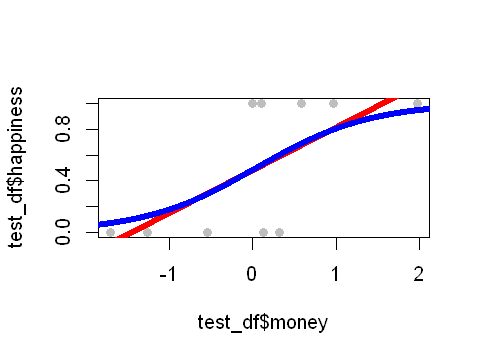

In [4]:
#lm 함수의 선형 회귀
plot(test_df$money, test_df$happiness, pch=19, cex=1, col="grey")
abline(lm(happiness~money, data=test_df), lwd=5, col="red")

#초기값
w<-0
b<-0

#1000번 학습
for(i in 1:1000){
  grad <- Gradient_Sigmoid(x=test_df$money, y=test_df$happiness, w=w, b=b)
  w<- w - 0.01*grad$dw
  b<- b - 0.01*grad$db
}


#학습 후의 곡선
temp <- seq(-3, 3, length=1000)
points(temp, Machine_Sigmoid(temp, w, b), lwd=5, type='l', col='blue')

__4강에서 배울 내용__  
  
>1강: 머신러닝 기초, 2강: regression(수치), 3강: classification(범주형)을 배웠으면    
어디까지 학습해야되는지를 보기 위해 `overfitting`을 배움  

> - 예측이 맞을 범위를 구하는 VC 이론    
> - 모델의 정확도를 평가하는 model assessment, cross validation  
> - 평가를 하는 여러 기준인 validation set(k-fold, LOO)  
> - 함수의 복잡도(크기)  
> - shrinkage method: ridge/ lasso  
 